# Building Better Budgets

> You suck at budgeting. But it’s not your fault. 

### 🐦 @maxhumber 

##### MinneFRAMA • 2018-12-03

![](images/logos.png)

![](images/return.png)

> “How much can I afford to sock away each month for my retirement, will my bank account survive a trip to Mauritius over Christmas, and should I quit my Bubble Tea habit?"


# 🐍 y Python tho? 

![](images/excel1.png)

![](images/excel2.png)

![](images/excel3.png)

![](images/r1.png)

![](images/expanding.png)

# The actual reason 📦

- `Altair`
- `Recurrent`
- `yaml`
- `Fire`

# Max's Rules of Dating

[Dates are a mess](https://i.stack.imgur.com/uiXQd.png)

![](https://i.stack.imgur.com/uiXQd.png)

# Max's Rules of Dating

1. Use `Timestamp`
2. `normalize` all the things

# STFU AND SHOW ME SOME CODE

In [1]:
import datetime
from dateutil import rrule

import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

from recurrent import RecurringEvent  # pip install recurrent
import yaml  # pip install pyyaml
import altair as alt

In [2]:
datetime.datetime.now()
# datetime.date.today()

datetime.datetime(2018, 12, 2, 8, 4, 20, 974839)

In [3]:
datetime.datetime(1993, 6, 7, 15, 16, 0)

datetime.datetime(1993, 6, 7, 15, 16)

## `Timestamp`

In [4]:
date_1 = datetime.datetime.now()

print(pd.Timestamp(date_1))
print(pd.to_datetime(date_1))

2018-12-02 08:04:20.996820
2018-12-02 08:04:20.996820


In [5]:
date_2 = pd.Timestamp(1993, 6, 7, 15, 16, 0)
date_2

Timestamp('1993-06-07 15:16:00')

In [6]:
date_3 = pd.Timestamp('2018-12-03')
date_3

Timestamp('2018-12-03 00:00:00')

In [7]:
type(date_3)

pandas._libs.tslibs.timestamps.Timestamp

In [8]:
[method for method in dir(date_3) if '__' not in method][10:30]

['astimezone',
 'ceil',
 'combine',
 'ctime',
 'date',
 'day',
 'day_name',
 'dayofweek',
 'dayofyear',
 'days_in_month',
 'daysinmonth',
 'dst',
 'floor',
 'fold',
 'freq',
 'freqstr',
 'fromordinal',
 'fromtimestamp',
 'hour',
 'is_leap_year']

## `.normalize`

In [9]:
print(date_1)
date_1 = pd.Timestamp(date_1)
print(date_1)
print(date_1.normalize())

2018-12-02 08:04:20.996820
2018-12-02 08:04:20.996820
2018-12-02 00:00:00


# Calendar

In [10]:
start = pd.Timestamp('now').normalize()
end = start + pd.Timedelta('365 days')

In [11]:
calendar = pd.DataFrame(index=pd.date_range(start, end))

In [12]:
calendar.head()

""
2018-12-02
2018-12-03
2018-12-04
2018-12-05
2018-12-06


# Hydrate

- Income: twice a month (\$1000)
- Rent: once a month (\$1500)

![](https://media2.giphy.com/media/XcqjhVYVCgNgs/giphy.gif?cid=3640f6095c02a9c95475614663ac4cae)

![](images/offsets.png)

In [13]:
income = pd.DataFrame(
    data={'income': 1000},
    index=pd.date_range(start, end, freq='SM')
)
income.head()

,income
2018-12-15,1000
2018-12-31,1000
2019-01-15,1000
2019-01-31,1000
2019-02-15,1000


In [14]:
rent = pd.DataFrame(
    data={'rent': -1500},
    index=pd.date_range(start, end, freq='MS')
)
rent.head()

,rent
2019-01-01,-1500
2019-02-01,-1500
2019-03-01,-1500
2019-04-01,-1500
2019-05-01,-1500


In [15]:
calendar = pd.concat([calendar, income], axis=1).fillna(0)
calendar = pd.concat([calendar, rent], axis=1).fillna(0)
calendar.head(10)

,income,rent
2018-12-02,0.0,0.0
2018-12-03,0.0,0.0
2018-12-04,0.0,0.0
2018-12-05,0.0,0.0
2018-12-06,0.0,0.0
2018-12-07,0.0,0.0
2018-12-08,0.0,0.0
2018-12-09,0.0,0.0
2018-12-10,0.0,0.0
2018-12-11,0.0,0.0


![](https://media.giphy.com/media/3o7btObApReFdPILwk/giphy.gif)

In [16]:
calendar['total'] = calendar.sum(axis=1)
calendar['cum_total'] = calendar['total'].cumsum()

In [17]:
calendar.tail(1)

,income,rent,total,cum_total
2019-12-02,0.0,0.0,0.0,6000.0


![](https://media.giphy.com/media/l46Cy1rHbQ92uuLXa/giphy.gif)

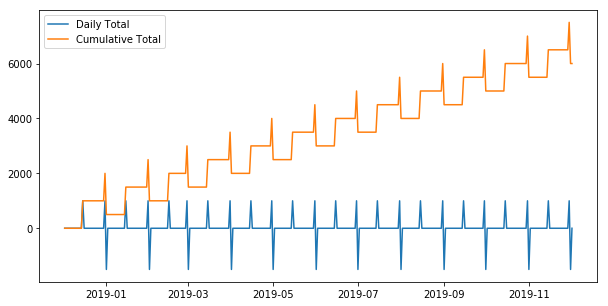

In [18]:
plt.figure(figsize=(10, 5))
plt.plot(calendar.index, calendar.total, label='Daily Total')
plt.plot(calendar.index, calendar.cum_total, label='Cumulative Total')
plt.legend()

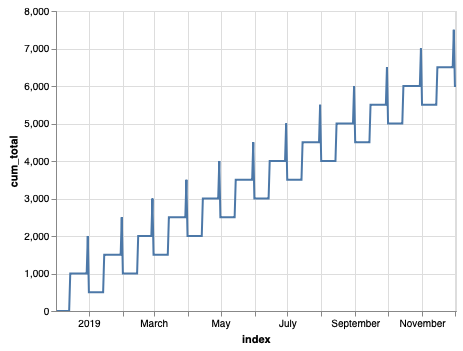

In [19]:
import altair as alt
alt.renderers.enable('notebook')

alt.Chart(calendar.reset_index())\
    .mark_line()\
    .encode(x='index', y='cum_total')

In [20]:
vis = (
    alt.Chart(calendar.reset_index())
    .mark_line(color='red')
    .encode(
        x='index', 
        y='cum_total',
        tooltip='cum_total'
    )
    .interactive()
    .properties(width=500, height=300)
)

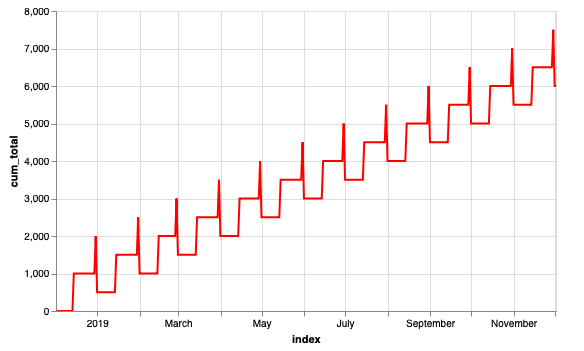

In [21]:
vis

In [22]:
def plot_budget(calendar):
    vis = (
        alt.Chart(calendar.reset_index())
        .mark_line(color='red')
        .encode(
            x=alt.X('index', title=''), 
            y=alt.Y('cum_total', title='Balance'),
            tooltip='cum_total'
        )
        .interactive()
        .properties(width=500, height=300, title='Forecast')
    )
    vis.display()

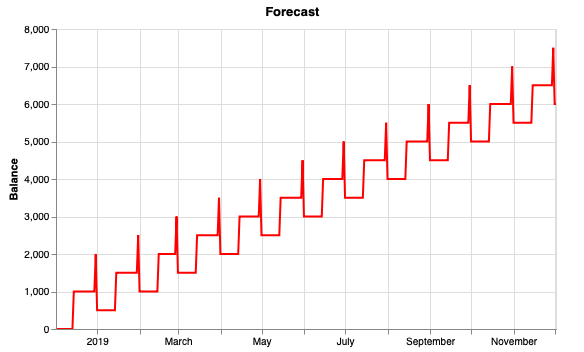

In [23]:
plot_budget(calendar)

![](https://media.giphy.com/media/gQdejV5BBChHi/giphy.gif)

In [24]:
bank = pd.DataFrame(
    data={'bank': 8000},
    index=pd.date_range(start, end=start)
)
print(bank)

            bank
2018-12-02  8000


In [25]:
calendar = pd.concat([calendar, bank], axis=1).fillna(0)

In [26]:
calendar.sum(axis=1).head()

2018-12-02    8000.0
2018-12-03       0.0
2018-12-04       0.0
2018-12-05       0.0
2018-12-06       0.0
Freq: D, dtype: float64

In [27]:
def update_totals(df):
    # check to see if these columns exit in our dataframe
    if df.columns.isin(['total', 'cum_total']).any():
        # if they do exist set the them to 0
        df['total'] = 0
        df['cum_total'] = 0
    # recalculate total and cumulative_total
    df['total'] = df.sum(axis=1)
    df['cum_total'] = df['total'].cumsum()
    return df

In [28]:
calendar = update_totals(calendar)

In [29]:
calendar.tail(5)

,income,rent,total,cum_total,bank
2019-11-28,0.0,0.0,0.0,14500.0,0.0
2019-11-29,0.0,0.0,0.0,14500.0,0.0
2019-11-30,1000.0,0.0,1000.0,15500.0,0.0
2019-12-01,0.0,-1500.0,-1500.0,14000.0,0.0
2019-12-02,0.0,0.0,0.0,14000.0,0.0


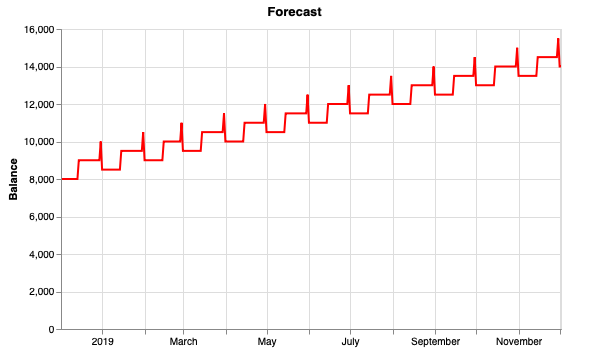

In [30]:
plot_budget(calendar)

![](images/mauritius.jpg)

In [31]:
vacation = pd.DataFrame(
    data={'vacation': -6000},
    index=[pd.Timestamp('2018-12-14').normalize()]
)
print(vacation)

            vacation
2018-12-14     -6000


In [32]:
calendar = pd.concat([calendar, vacation], axis=1).fillna(0)

In [33]:
calendar = update_totals(calendar)

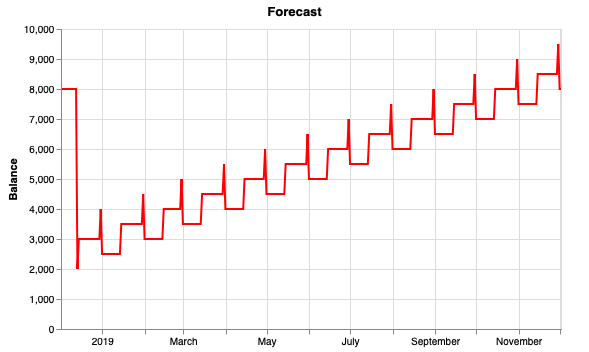

In [34]:
plot_budget(calendar)

# More...

In [35]:
start = pd.Timestamp('now').normalize()
end = start + pd.Timedelta('365 days')

In [36]:
# every day
pd.date_range(start, end, freq='D')

DatetimeIndex(['2018-12-02', '2018-12-03', '2018-12-04', '2018-12-05',
               '2018-12-06', '2018-12-07', '2018-12-08', '2018-12-09',
               '2018-12-10', '2018-12-11',
               ...
               '2019-11-23', '2019-11-24', '2019-11-25', '2019-11-26',
               '2019-11-27', '2019-11-28', '2019-11-29', '2019-11-30',
               '2019-12-01', '2019-12-02'],
              dtype='datetime64[ns]', length=366, freq='D')

In [37]:
# every weekday
pd.date_range(start, end, freq='B')

DatetimeIndex(['2018-12-03', '2018-12-04', '2018-12-05', '2018-12-06',
               '2018-12-07', '2018-12-10', '2018-12-11', '2018-12-12',
               '2018-12-13', '2018-12-14',
               ...
               '2019-11-19', '2019-11-20', '2019-11-21', '2019-11-22',
               '2019-11-25', '2019-11-26', '2019-11-27', '2019-11-28',
               '2019-11-29', '2019-12-02'],
              dtype='datetime64[ns]', length=261, freq='B')

In [38]:
# every weekend
pd.DatetimeIndex(
    set(pd.date_range(start, end, freq='D')) - set(pd.date_range(start, end, freq='B'))
)

DatetimeIndex(['2019-10-12', '2019-04-14', '2019-01-26', '2019-05-12',
               '2019-09-01', '2019-03-30', '2019-06-02', '2018-12-08',
               '2019-05-05', '2019-05-18',
               ...
               '2019-06-29', '2019-04-28', '2019-11-03', '2019-06-01',
               '2019-08-10', '2019-11-02', '2019-03-02', '2019-11-09',
               '2019-11-17', '2019-10-13'],
              dtype='datetime64[ns]', length=105, freq=None)

In [39]:
# every week
# pd.date_range(start, end, freq='W') # bad
# start.day_name()
pd.date_range(start, end, freq='7D')

DatetimeIndex(['2018-12-02', '2018-12-09', '2018-12-16', '2018-12-23',
               '2018-12-30', '2019-01-06', '2019-01-13', '2019-01-20',
               '2019-01-27', '2019-02-03', '2019-02-10', '2019-02-17',
               '2019-02-24', '2019-03-03', '2019-03-10', '2019-03-17',
               '2019-03-24', '2019-03-31', '2019-04-07', '2019-04-14',
               '2019-04-21', '2019-04-28', '2019-05-05', '2019-05-12',
               '2019-05-19', '2019-05-26', '2019-06-02', '2019-06-09',
               '2019-06-16', '2019-06-23', '2019-06-30', '2019-07-07',
               '2019-07-14', '2019-07-21', '2019-07-28', '2019-08-04',
               '2019-08-11', '2019-08-18', '2019-08-25', '2019-09-01',
               '2019-09-08', '2019-09-15', '2019-09-22', '2019-09-29',
               '2019-10-06', '2019-10-13', '2019-10-20', '2019-10-27',
               '2019-11-03', '2019-11-10', '2019-11-17', '2019-11-24',
               '2019-12-01'],
              dtype='datetime64[ns]', freq='7D'

In [40]:
# every two weeks
# pd.date_range(start, end, freq='2W') # bad
pd.date_range(start, end, freq='14D')

DatetimeIndex(['2018-12-02', '2018-12-16', '2018-12-30', '2019-01-13',
               '2019-01-27', '2019-02-10', '2019-02-24', '2019-03-10',
               '2019-03-24', '2019-04-07', '2019-04-21', '2019-05-05',
               '2019-05-19', '2019-06-02', '2019-06-16', '2019-06-30',
               '2019-07-14', '2019-07-28', '2019-08-11', '2019-08-25',
               '2019-09-08', '2019-09-22', '2019-10-06', '2019-10-20',
               '2019-11-03', '2019-11-17', '2019-12-01'],
              dtype='datetime64[ns]', freq='14D')

In [41]:
# every month
pd.date_range(start, end, freq='M').shift(7, freq='D')

DatetimeIndex(['2019-01-07', '2019-02-07', '2019-03-07', '2019-04-07',
               '2019-05-07', '2019-06-07', '2019-07-07', '2019-08-07',
               '2019-09-07', '2019-10-07', '2019-11-07', '2019-12-07'],
              dtype='datetime64[ns]', freq=None)

In [42]:
# SemiMonthEnd 15th and calendar month end
pd.date_range(start, end, freq='SM')

DatetimeIndex(['2018-12-15', '2018-12-31', '2019-01-15', '2019-01-31',
               '2019-02-15', '2019-02-28', '2019-03-15', '2019-03-31',
               '2019-04-15', '2019-04-30', '2019-05-15', '2019-05-31',
               '2019-06-15', '2019-06-30', '2019-07-15', '2019-07-31',
               '2019-08-15', '2019-08-31', '2019-09-15', '2019-09-30',
               '2019-10-15', '2019-10-31', '2019-11-15', '2019-11-30'],
              dtype='datetime64[ns]', freq='SM-15')

In [43]:
anchor = '2018-12-03'
frequency = 'every week'

def generate_dates(start, end, anchor, frequency):
    if frequency == 'every day':
        return pd.date_range(start, end, freq='D')
    if frequency == 'every weekday':
        return pd.date_range(start, end, freq='B')
    if frequency == 'every weekend':
        return pd.DatetimeIndex(
            set(pd.date_range(start, end, freq='D')) -
            set(pd.date_range(start, end, freq='B'))
        )
    if frequency == 'every week':
        return pd.date_range(anchor, end, freq='7D')
    if frequency in ('every two weeks', 'every other week'):
        return pd.date_range(anchor, end, freq='14D')
    if frequency == 'every month':
        d = pd.Timestamp(anchor).day
        return pd.date_range(start, end, freq='M').shift(d, freq='D')
    if frequency == 'twice a month':
        return pd.date_range(start, end, freq='SM')

In [44]:
generate_dates(start, end, '2018-12-03', 'every week')

DatetimeIndex(['2018-12-03', '2018-12-10', '2018-12-17', '2018-12-24',
               '2018-12-31', '2019-01-07', '2019-01-14', '2019-01-21',
               '2019-01-28', '2019-02-04', '2019-02-11', '2019-02-18',
               '2019-02-25', '2019-03-04', '2019-03-11', '2019-03-18',
               '2019-03-25', '2019-04-01', '2019-04-08', '2019-04-15',
               '2019-04-22', '2019-04-29', '2019-05-06', '2019-05-13',
               '2019-05-20', '2019-05-27', '2019-06-03', '2019-06-10',
               '2019-06-17', '2019-06-24', '2019-07-01', '2019-07-08',
               '2019-07-15', '2019-07-22', '2019-07-29', '2019-08-05',
               '2019-08-12', '2019-08-19', '2019-08-26', '2019-09-02',
               '2019-09-09', '2019-09-16', '2019-09-23', '2019-09-30',
               '2019-10-07', '2019-10-14', '2019-10-21', '2019-10-28',
               '2019-11-04', '2019-11-11', '2019-11-18', '2019-11-25',
               '2019-12-02'],
              dtype='datetime64[ns]', freq='7D'

![](https://proxy.duckduckgo.com/iu/?u=http%3A%2F%2Fen.memgenerator.pl%2Fmem-image%2Fenglish-do-you-speak-it-en-ffffff&f=1)

In [45]:
frequency = 'every week until July 10th'

    !pip install recurrent

In [46]:
from recurrent import RecurringEvent

In [47]:
r = RecurringEvent()
r.parse(frequency)

# will allow us to generate a recurrance rule (rrule) that is iCalendar RFC compliant.

'RRULE:INTERVAL=1;FREQ=WEEKLY;UNTIL=20190710'

In [48]:
from dateutil import rrule

In [49]:
rr = rrule.rrulestr(r.get_RFC_rrule())
rr

In [50]:
rr.between(start, end)

[datetime.datetime(2018, 12, 2, 8, 4, 22),
 datetime.datetime(2018, 12, 9, 8, 4, 22),
 datetime.datetime(2018, 12, 16, 8, 4, 22),
 datetime.datetime(2018, 12, 23, 8, 4, 22),
 datetime.datetime(2018, 12, 30, 8, 4, 22),
 datetime.datetime(2019, 1, 6, 8, 4, 22),
 datetime.datetime(2019, 1, 13, 8, 4, 22),
 datetime.datetime(2019, 1, 20, 8, 4, 22),
 datetime.datetime(2019, 1, 27, 8, 4, 22),
 datetime.datetime(2019, 2, 3, 8, 4, 22),
 datetime.datetime(2019, 2, 10, 8, 4, 22),
 datetime.datetime(2019, 2, 17, 8, 4, 22),
 datetime.datetime(2019, 2, 24, 8, 4, 22),
 datetime.datetime(2019, 3, 3, 8, 4, 22),
 datetime.datetime(2019, 3, 10, 8, 4, 22),
 datetime.datetime(2019, 3, 17, 8, 4, 22),
 datetime.datetime(2019, 3, 24, 8, 4, 22),
 datetime.datetime(2019, 3, 31, 8, 4, 22),
 datetime.datetime(2019, 4, 7, 8, 4, 22),
 datetime.datetime(2019, 4, 14, 8, 4, 22),
 datetime.datetime(2019, 4, 21, 8, 4, 22),
 datetime.datetime(2019, 4, 28, 8, 4, 22),
 datetime.datetime(2019, 5, 5, 8, 4, 22),
 datetime.dat

In [51]:
[pd.to_datetime(date).normalize() for date in rr.between(start, end)]

[Timestamp('2018-12-02 00:00:00'),
 Timestamp('2018-12-09 00:00:00'),
 Timestamp('2018-12-16 00:00:00'),
 Timestamp('2018-12-23 00:00:00'),
 Timestamp('2018-12-30 00:00:00'),
 Timestamp('2019-01-06 00:00:00'),
 Timestamp('2019-01-13 00:00:00'),
 Timestamp('2019-01-20 00:00:00'),
 Timestamp('2019-01-27 00:00:00'),
 Timestamp('2019-02-03 00:00:00'),
 Timestamp('2019-02-10 00:00:00'),
 Timestamp('2019-02-17 00:00:00'),
 Timestamp('2019-02-24 00:00:00'),
 Timestamp('2019-03-03 00:00:00'),
 Timestamp('2019-03-10 00:00:00'),
 Timestamp('2019-03-17 00:00:00'),
 Timestamp('2019-03-24 00:00:00'),
 Timestamp('2019-03-31 00:00:00'),
 Timestamp('2019-04-07 00:00:00'),
 Timestamp('2019-04-14 00:00:00'),
 Timestamp('2019-04-21 00:00:00'),
 Timestamp('2019-04-28 00:00:00'),
 Timestamp('2019-05-05 00:00:00'),
 Timestamp('2019-05-12 00:00:00'),
 Timestamp('2019-05-19 00:00:00'),
 Timestamp('2019-05-26 00:00:00'),
 Timestamp('2019-06-02 00:00:00'),
 Timestamp('2019-06-09 00:00:00'),
 Timestamp('2019-06-

In [52]:
def get_dates(frequency):
    # let pandas try to do it's thing
    try:
        return [pd.Timestamp(frequency).normalize()]
    except ValueError:
        pass
    # parse frequency with recurrent
    try:
        r = RecurringEvent()
        r.parse(frequency)
        rr = rrule.rrulestr(r.get_RFC_rrule())
        return [
            pd.to_datetime(date).normalize() 
            for date in rr.between(start, end)
        ]
    except ValueError:
        raise ValueError('Invalid frequency')

In [53]:
get_dates('2019-01-01')

[Timestamp('2019-01-01 00:00:00')]

In [54]:
get_dates('every week until July 10th')

[Timestamp('2018-12-02 00:00:00'),
 Timestamp('2018-12-09 00:00:00'),
 Timestamp('2018-12-16 00:00:00'),
 Timestamp('2018-12-23 00:00:00'),
 Timestamp('2018-12-30 00:00:00'),
 Timestamp('2019-01-06 00:00:00'),
 Timestamp('2019-01-13 00:00:00'),
 Timestamp('2019-01-20 00:00:00'),
 Timestamp('2019-01-27 00:00:00'),
 Timestamp('2019-02-03 00:00:00'),
 Timestamp('2019-02-10 00:00:00'),
 Timestamp('2019-02-17 00:00:00'),
 Timestamp('2019-02-24 00:00:00'),
 Timestamp('2019-03-03 00:00:00'),
 Timestamp('2019-03-10 00:00:00'),
 Timestamp('2019-03-17 00:00:00'),
 Timestamp('2019-03-24 00:00:00'),
 Timestamp('2019-03-31 00:00:00'),
 Timestamp('2019-04-07 00:00:00'),
 Timestamp('2019-04-14 00:00:00'),
 Timestamp('2019-04-21 00:00:00'),
 Timestamp('2019-04-28 00:00:00'),
 Timestamp('2019-05-05 00:00:00'),
 Timestamp('2019-05-12 00:00:00'),
 Timestamp('2019-05-19 00:00:00'),
 Timestamp('2019-05-26 00:00:00'),
 Timestamp('2019-06-02 00:00:00'),
 Timestamp('2019-06-09 00:00:00'),
 Timestamp('2019-06-

In [55]:
# get_dates("this won't work")

![](https://media.giphy.com/media/KNGCOk8R8XmHS/giphy.gif)

In [56]:
dates = get_dates('every weekday')
dates[:10]  # first ten instances of the recurrance rule

[Timestamp('2018-12-03 00:00:00'),
 Timestamp('2018-12-04 00:00:00'),
 Timestamp('2018-12-05 00:00:00'),
 Timestamp('2018-12-06 00:00:00'),
 Timestamp('2018-12-07 00:00:00'),
 Timestamp('2018-12-10 00:00:00'),
 Timestamp('2018-12-11 00:00:00'),
 Timestamp('2018-12-12 00:00:00'),
 Timestamp('2018-12-13 00:00:00'),
 Timestamp('2018-12-14 00:00:00')]

In [57]:
pd.DatetimeIndex(pd.Series(dates))

DatetimeIndex(['2018-12-03', '2018-12-04', '2018-12-05', '2018-12-06',
               '2018-12-07', '2018-12-10', '2018-12-11', '2018-12-12',
               '2018-12-13', '2018-12-14',
               ...
               '2019-11-18', '2019-11-19', '2019-11-20', '2019-11-21',
               '2019-11-22', '2019-11-25', '2019-11-26', '2019-11-27',
               '2019-11-28', '2019-11-29'],
              dtype='datetime64[ns]', length=260, freq=None)

In [58]:
dates = get_dates('every weekday')

bbt = pd.DataFrame(
    data={'bubble_tea': -6},
    index=pd.DatetimeIndex(pd.Series(dates))
)

In [59]:
calendar = pd.concat([calendar, bbt], axis=1).fillna(0)

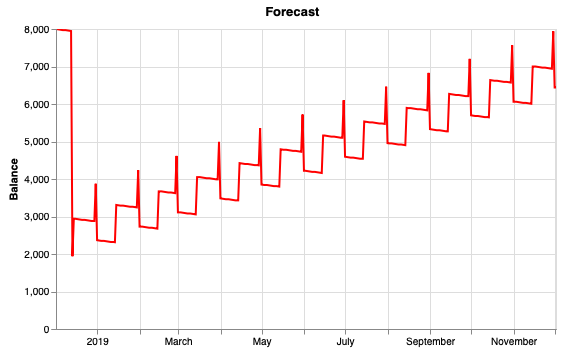

In [60]:
calendar = update_totals(calendar)
plot_budget(calendar)

## YAML

    !pip install pyyaml

In [61]:
import yaml

budget = yaml.load('''
bank:
    frequency: today
    amount: 8000
income:
    frequency: every 2 weeks on Friday
    amount: 1000
rent:
    frequency: every month
    amount: -1500
mauritius:
    frequency: 2018-12-14
    amount: -6000
bubble_tea:
    frequency: every weekday
    amount: -7
''')

In [62]:
budget

{'bank': {'frequency': 'today', 'amount': 8000},
 'income': {'frequency': 'every 2 weeks on Friday', 'amount': 1000},
 'rent': {'frequency': 'every month', 'amount': -1500},
 'mauritius': {'frequency': datetime.date(2018, 12, 14), 'amount': -6000},
 'bubble_tea': {'frequency': 'every weekday', 'amount': -7}}

In [63]:
calendar = pd.DataFrame(index=pd.date_range(start, end))

for k, v in budget.items():
    frequency = v.get('frequency')
    amount = v.get('amount')
    dates = get_dates(frequency)
    i = pd.DataFrame(
        data={k: amount},
        index=pd.DatetimeIndex(pd.Series(dates))
    )
    calendar = pd.concat([calendar, i], axis=1).fillna(0)

calendar['total'] = calendar.sum(axis=1)
calendar['cum_total'] = calendar['total'].cumsum()

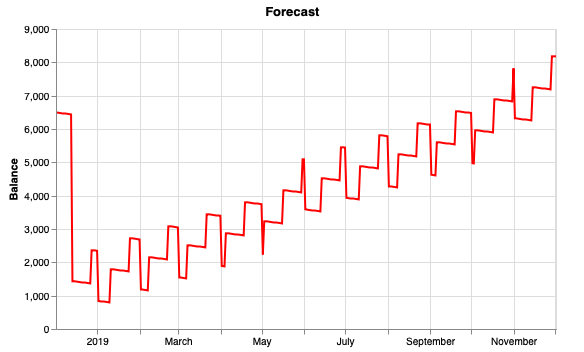

In [64]:
plot_budget(calendar)

In [65]:
def build_calendar(budget):
    
    calendar = pd.DataFrame(index=pd.date_range(start, end))

    for k, v in budget.items():
        frequency = v.get('frequency')
        amount = v.get('amount')
        dates = get_dates(frequency)
        i = pd.DataFrame(
            data={k: amount},
            index=pd.DatetimeIndex(pd.Series(dates))
        )
        calendar = pd.concat([calendar, i], axis=1).fillna(0)

    calendar['total'] = calendar.sum(axis=1)
    calendar['cum_total'] = calendar['total'].cumsum()
   
    return calendar

![](https://d3atagt0rnqk7k.cloudfront.net/wp-content/uploads/2018/02/22172837/english-parliament-cannabis-measure-1280x800.jpg)

In [66]:
budget = yaml.load('''
bank:
    frequency: today
    amount: 8000
income:
    frequency: every 2 weeks on Friday
    amount: 1000
rent:
    frequency: every month
    amount: -1500
mauritius:
    frequency: 2018-12-14
    amount: -6000
bubble_tea:
    frequency: every weekday
    amount: -7
england:
    frequency: 2019-05-02
    amount: -1500
''')

In [67]:
calendar = build_calendar(budget)

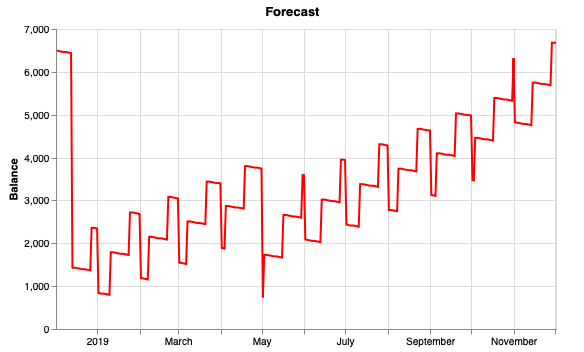

In [68]:
plot_budget(calendar)

![](http://www.okayplayer.com/wp-content/uploads/2013/01/Kendrick-Lamar-SNL-Digital-Short-YOLO.png)

In [69]:
budget = yaml.load('''
bank:
    frequency: today
    amount: 8000
income:
    frequency: every 2 weeks on Friday
    amount: 1000
rent:
    frequency: every month
    amount: -1500
mauritius:
    frequency: 2018-12-14
    amount: -6000
bubble_tea:
    frequency: every weekday
    amount: -7
england:
    frequency: 2019-05-02
    amount: -1500
savings:
    frequency: every Monday starting in June
    amount: -100
''')

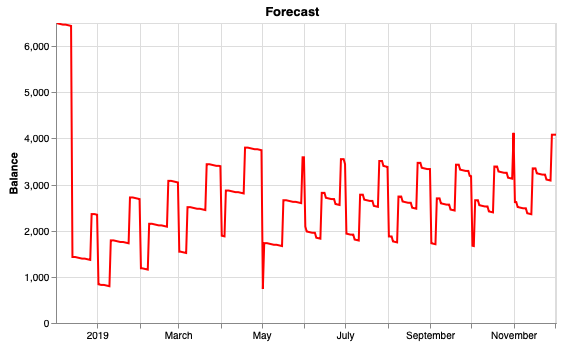

In [70]:
calendar = build_calendar(budget)
plot_budget(calendar)

# 🔥 `demo`

![](https://image.freepik.com/free-vector/thank-you-lettering_1262-6963.jpg)

- Twitter: `@maxhumber`
- LinkedIn: `/in/maxhumber`